## EDA

In [60]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_bar, geom_histogram
import seaborn as sns
sns.set_theme(style="white")


In [53]:
data = pd.read_csv('./data/redfin_cleaned_stage_1.csv')

C:\Users\jackc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


In [55]:
data.drop(['Unnamed: 0','NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'ZIP OR POSTAL CODE',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
        'SOURCE','FAVORITE','INTERESTED']
       , axis=1, inplace=True)
data.rename(columns={
    'SALE TYPE':'Sale_Type',
    'SOLD DATE':'Sold_Date',
    'PROPERTY TYPE':'Prop_Type',
    'STATE OR PROVINCE':'State', 
    'SQUARE FEET':'SF', 
    'LOT SIZE':'Lot_Size', 
    'YEAR BUILT':'YearBuilt',
    'DAYS ON MARKET':'Days_on_Mkt', 
    '$/SQUARE FEET':'px_perSF', 
    'HOA/MONTH':'HOA_perMonth'
}, inplace=True)

In [56]:
nulls = data.isnull().sum()/data.shape[0] * 100 

In [57]:
nulls

Sale_Type         0.000000
Sold_Date       100.000000
Prop_Type         0.000000
ADDRESS           0.000746
CITY              0.112688
State             0.000000
PRICE             0.007463
BEDS             37.294586
BATHS            37.863252
LOCATION          3.429902
SF               39.684174
Lot_Size         26.313079
YearBuilt        41.445395
Days_on_Mkt       3.072434
px_perSF         39.684921
HOA_perMonth     61.959134
STATUS            0.000000
MLS#              0.002985
LATITUDE          0.000000
LONGITUDE         0.000000
zip               0.000000
dtype: float64

<AxesSubplot:>

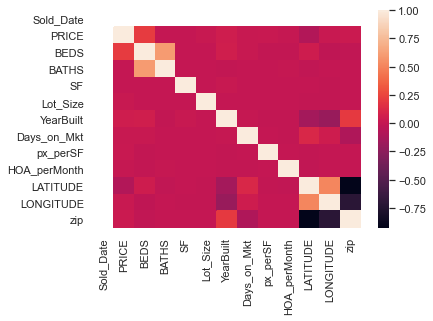

In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = data.select_dtypes(include=numerics)
corr = numeric_df.corr()
sns.heatmap(data=corr)

<AxesSubplot:xlabel='log_price', ylabel='Count'>

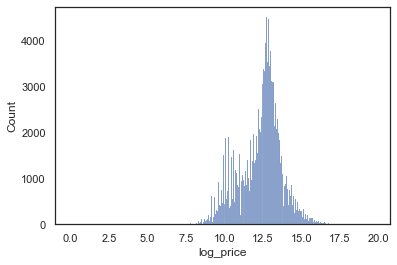

In [75]:
data['log_price'] = np.log(data['PRICE'])
sns.histplot(data = data, x = 'log_price')

In [77]:
data.dtypes

Sale_Type        object
Sold_Date       float64
Prop_Type        object
ADDRESS          object
CITY             object
State            object
PRICE           float64
BEDS            float64
BATHS           float64
LOCATION         object
SF              float64
Lot_Size        float64
YearBuilt       float64
Days_on_Mkt     float64
px_perSF        float64
HOA_perMonth    float64
STATUS           object
MLS#             object
LATITUDE        float64
LONGITUDE       float64
zip               int64
log_price       float64
dtype: object

In [78]:
categorical = ['object']
categorical_df = data.select_dtypes(include=categorical)

<AxesSubplot:xlabel='Sale_Type', ylabel='Count'>

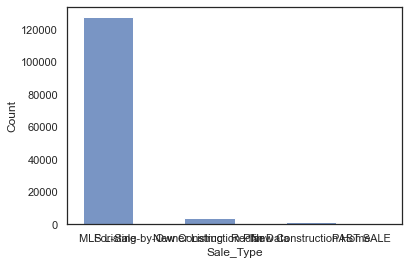

In [103]:
sns.histplot(categorical_df, x='Sale_Type')

<AxesSubplot:xlabel='State', ylabel='Count'>

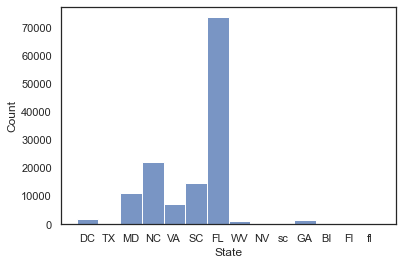

In [82]:
sns.histplot(categorical_df, x='State')


In [86]:
data.columns

Index(['Sale_Type', 'Sold_Date', 'Prop_Type', 'ADDRESS', 'CITY', 'State',
       'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SF', 'Lot_Size', 'YearBuilt',
       'Days_on_Mkt', 'px_perSF', 'HOA_perMonth', 'STATUS', 'MLS#', 'LATITUDE',
       'LONGITUDE', 'zip', 'log_price'],
      dtype='object')

In [96]:
data = data[data['PRICE'] < 300000]

<AxesSubplot:xlabel='SF', ylabel='PRICE'>

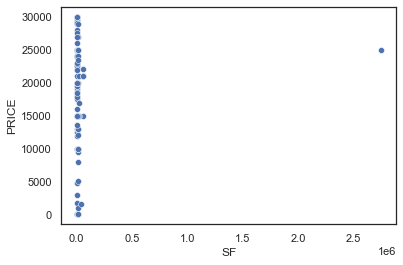

In [99]:
# sns.scatterplot(data = data, x = "Lot_Size", y = "PRICE")
sns.scatterplot(data = data, x = "SF", y = "PRICE")
